# Análise do dataset de sobreviventes do titanic

Este jupiter notebook tem como objetivo analisar o dataset do titanic e desenvolver um modelo que possa ser capaz de prever que sobreviverá ao naufráfio.

In [1]:
import pandas as pd

df_train = pd.read_csv('./datasets/titanic/train.csv')
df_test = pd.read_csv('./datasets/titanic/test.csv')

df = pd.concat([df_train, df_test], ignore_index=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable       |	Definition   |	Key     |
:--------------|:----------------|:---------|
survival |	Survival   |0 = No, 1 = Yes
pclass	 |Ticket class |1 = 1st, 2 = 2nd, 3 = 3rd
sex	|Sex|	
Age	|Age| in years	
sibsp|	# of siblings / spouses aboard the Titanic	|
parch|	# of parents / children aboard the Titanic	|
ticket|	Ticket number	|
fare	|Passenger fare	|
cabin|	Cabin number	|
embarked	|Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
df['Pclass'] = df['Pclass'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

## Análise exploratória

Vamos analisar o dataset para entender como estão distribidas as informações para assim obter insigths dos dados.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="darkgrid")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   category
dtypes: category(2), float64(3), int64(3), object(4)
memory usage: 105.2+ KB


<Figure size 864x576 with 0 Axes>

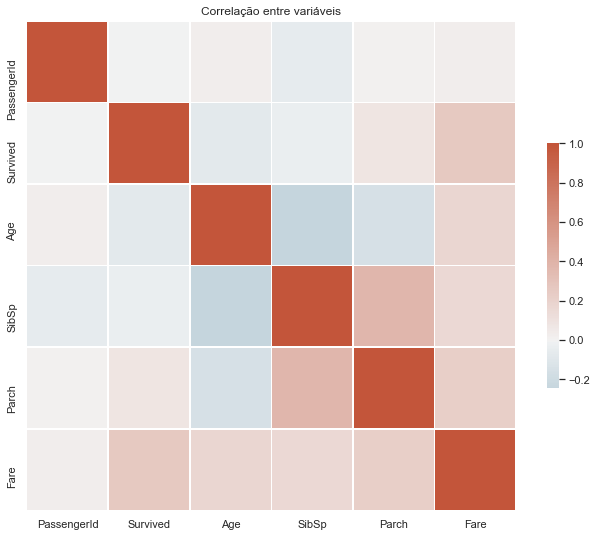

In [5]:
plt.figure(figsize=(12,8))

corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) \
            .set(title='Correlação entre variáveis')
plt.show()

### Idade

In [6]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [7]:
df['CategoricalAge'] = pd.cut(df.Age, bins=[0, 2, 12, 18, 65, 99], labels=['Baby', 'Child', 'Young', 'Adult', 'Elderly'])
df['CategoricalAge'] = df['CategoricalAge'].astype('category')
df['CategoricalAge']

0       Adult
1       Adult
2       Adult
3       Adult
4       Adult
        ...  
1304      NaN
1305    Adult
1306    Adult
1307      NaN
1308      NaN
Name: CategoricalAge, Length: 1309, dtype: category
Categories (5, object): ['Baby' < 'Child' < 'Young' < 'Adult' < 'Elderly']

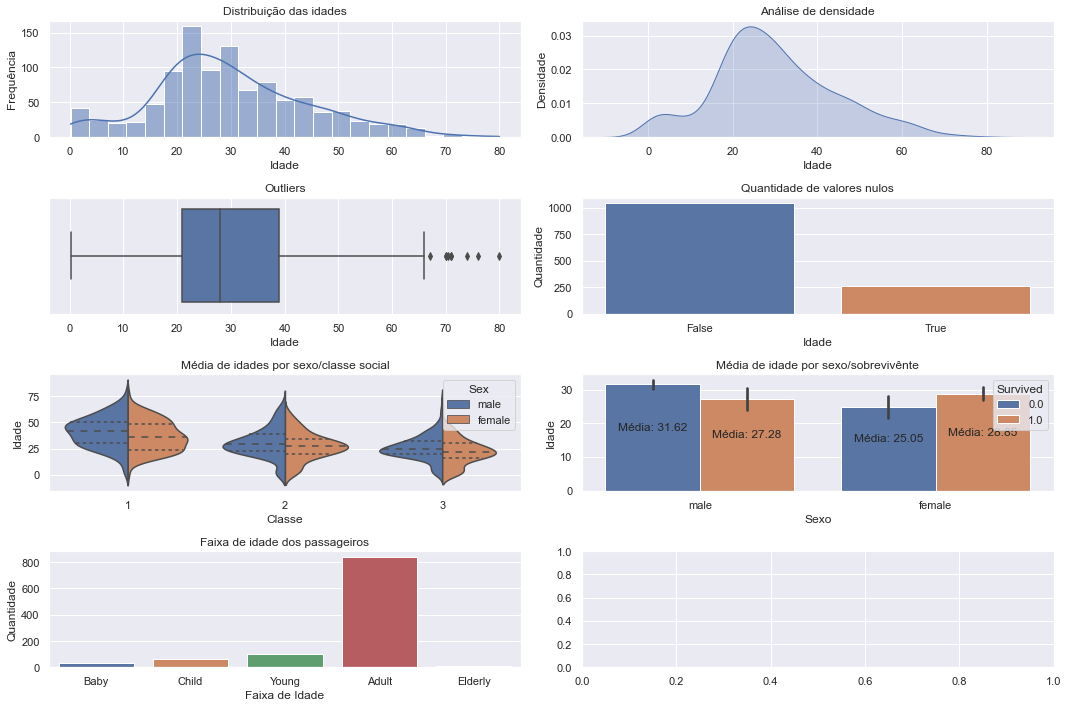

In [8]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,10))

sns.histplot(data=df, x='Age', kde=True, ax=ax[0][0]).set(title='Distribuição das idades', xlabel='Idade', ylabel='Frequência')
sns.kdeplot(data=df, x='Age', shade=True, ax=ax[0][1]).set(title='Análise de densidade', xlabel='Idade', ylabel='Densidade')
sns.boxplot(data=df, x='Age', ax=ax[1][0]).set(title='Outliers', xlabel='Idade')
sns.countplot(x=df.Age.isna(), ax=ax[1][1]).set(title='Quantidade de valores nulos', xlabel='Idade', ylabel='Quantidade')
sns.violinplot(data=df, x='Pclass', y='Age', hue='Sex', split=True,  inner='quartile', ax=ax[2][0]) \
    .set(title='Média de idades por sexo/classe social', xlabel='Classe', ylabel='Idade')

sns.barplot(y='Age', x='Sex', hue='Survived', data=df, ax=ax[2][1]).set(title='Média de idade por sexo/sobrevivênte', xlabel='Sexo', ylabel='Idade')
for p in ax[2][1].patches:
    ax[2][1].annotate(f'Média: {p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(data=df, x='CategoricalAge', ax=ax[3][0]).set(title='Faixa de idade dos passageiros', xlabel='Faixa de Idade', ylabel='Quantidade')

plt.tight_layout()
plt.show()

### Classe

In [9]:
df['Pclass'].describe()

count     1309
unique       3
top          3
freq       709
Name: Pclass, dtype: int64

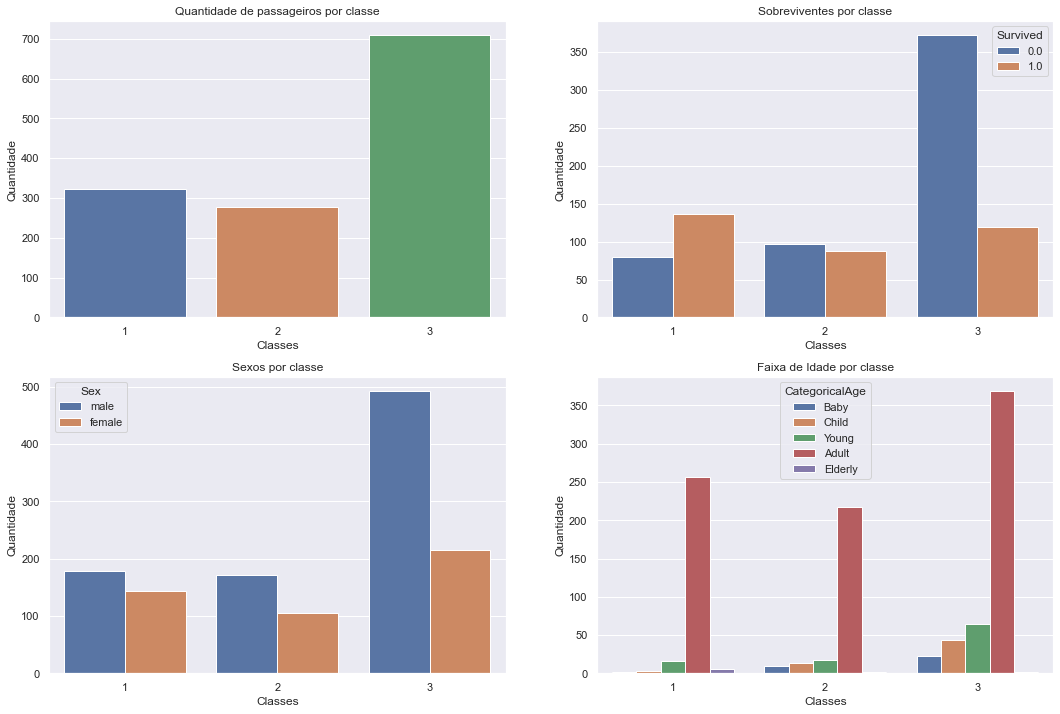

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

sns.countplot(x='Pclass', data=df, ax=ax[0][0]).set(title='Quantidade de passageiros por classe', xlabel='Classes', ylabel='Quantidade')
sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax[0][1]).set(title='Sobreviventes por classe', xlabel='Classes', ylabel='Quantidade')
sns.countplot(x='Pclass', hue='Sex', data=df, ax=ax[1][0]).set(title='Sexos por classe', xlabel='Classes', ylabel='Quantidade')
sns.countplot(x='Pclass', hue='CategoricalAge', data=df, ax=ax[1][1]).set(title='Faixa de Idade por classe', xlabel='Classes', ylabel='Quantidade')

plt.show()

### Name, Family

In [11]:
df['Surname'] = np.array(df['Name'].str.split(',').tolist())[:, 0]

In [12]:
df['Surname'].describe()

count     1309
unique     875
top       Sage
freq        11
Name: Surname, dtype: object

In [13]:
family = df.groupby(['Surname']).agg(Quantity=('Name', len), Names=('Name', ' '.join)).sort_values('Quantity', ascending=False)
family[family['Quantity'] > 1]

,Quantity,Names
Surname,,
Andersson,11,"Andersson, Mr. Anders Johan Andersson, Miss. E..."
Sage,11,"Sage, Master. Thomas Henry Sage, Miss. Constan..."
Goodwin,8,"Goodwin, Master. William Frederick Goodwin, Mi..."
Asplund,8,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia..."
Davies,7,"Davies, Mr. Charles Henry Davies, Master. John..."
...,...,...
Connolly,2,"Connolly, Miss. Kate Connolly, Miss. Kate"
Stengel,2,"Stengel, Mrs. Charles Emil Henry (Annie May Mo..."
Stanley,2,"Stanley, Mr. Edward Roland Stanley, Miss. Amy ..."


In [14]:
df.loc[(df['SibSp'] > 0) | (df['Parch'] > 0)][['Surname', 'SibSp', 'Parch']]

,Surname,SibSp,Parch
0,Braund,1,0
1,Cumings,1,0
3,Futrelle,1,0
7,Palsson,3,1
8,Johnson,0,2
...,...,...,...
1297,Ware,1,0
1298,Widener,1,1
1300,Peacock,1,1
1302,Minahan,1,0


In [15]:
df[df['Surname'] == 'Andersson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge,Surname
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Adult,Andersson
68,69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,Young,Andersson
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Baby,Andersson
146,147,1.0,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,Adult,Andersson
541,542,0.0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,Child,Andersson
542,543,0.0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,Child,Andersson
610,611,0.0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,Adult,Andersson
813,814,0.0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,Child,Andersson
850,851,0.0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Child,Andersson
1105,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,Adult,Andersson


In [16]:
df['FamilySize'] = df['Surname'].apply(lambda x: family.loc[x].Quantity)

In [17]:
family.reset_index(inplace=True)
family.groupby(['Quantity'])['Surname'].agg(len)

Quantity
1     637
2     133
3      63
4      22
5       6
6       9
7       1
8       2
11      2
Name: Surname, dtype: int64

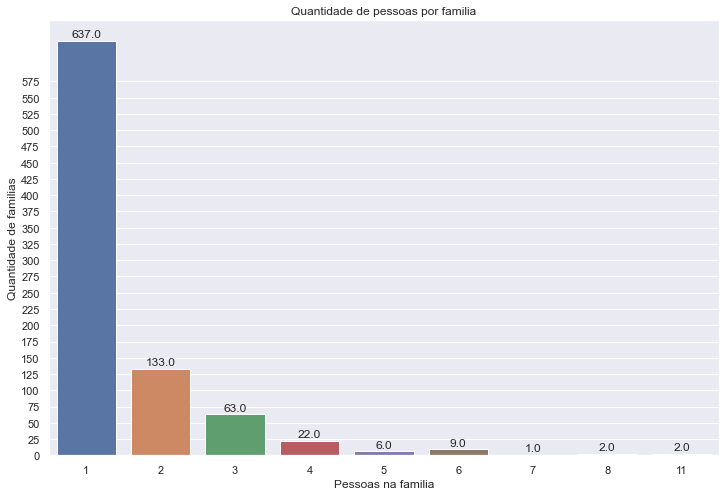

In [18]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Quantity', data=family)
ax.set(title='Quantidade de pessoas por familia', xlabel='Pessoas na familia', ylabel='Quantidade de familias', yticks=np.arange(0, 600, 25))

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()+ 10), va='center', ha='center')

plt.show()


### Ticket

In [19]:
df['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

In [20]:
df['Ticket'].value_counts().sort_values(ascending=False)

CA. 2343      11
1601           8
CA 2144        8
PC 17608       7
347077         7
              ..
A.5. 18509     1
349242         1
234818         1
315082         1
9232           1
Name: Ticket, Length: 929, dtype: int64

In [21]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge,Surname,FamilySize
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Sage,11
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Sage,11
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Sage,11
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Sage,11
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Sage,11
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Sage,11
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Sage,11
1079,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,Sage,11
1233,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,Sage,11
1251,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,Young,Sage,11


In [22]:
df.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,0.028814,-0.055224,0.008942,0.031428,-0.014212
Survived,-0.005007,1.000000,-0.077221,-0.035322,0.081629,0.257307,-0.025524
Age,0.028814,-0.077221,1.000000,-0.243699,-0.150917,0.178740,-0.209419
SibSp,-0.055224,-0.035322,-0.243699,1.000000,0.373587,0.160238,0.701735
Parch,0.008942,0.081629,-0.150917,0.373587,1.000000,0.221539,0.641979
Fare,0.031428,0.257307,0.178740,0.160238,0.221539,1.000000,0.141039
FamilySize,-0.014212,-0.025524,-0.209419,0.701735,0.641979,0.141039,1.000000
